 - Student Name and ID: Rucha Gurav, 1001773732 
 - Student Name and ID: Mohammad Suraj Shaik, 1001769791

In [2]:
#reference - https://www.geeksforgeeks.org/decision-tree-implementation-python/
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
#reading the csv file into data frame
df_data = pd.read_csv('train_cl.csv')

In [4]:
#printing the top 5 rows of dataframe
df_data.head()

,Unnamed: 0,Survived,Sex,Age,Fare,famiy,Embarked_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,...,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,isAlone
0,0,0,0,22.0,7.2500,2,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,1,1,38.0,71.2833,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2,1,1,26.0,7.9250,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3,3,1,1,35.0,53.1000,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,4,0,0,35.0,8.0500,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [5]:
#printing the last 5 rows of dataframe
df_data.tail()

,Unnamed: 0,Survived,Sex,Age,Fare,famiy,Embarked_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,...,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,isAlone
886,886,0,0,27.000000,13.00,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
887,887,1,1,19.000000,30.00,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
888,888,0,1,29.699118,23.45,4,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
889,889,1,0,26.000000,30.00,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
890,890,0,0,32.000000,7.75,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [6]:
#printing the class labels
class_labels  = df_data['isAlone'].unique()
print(class_labels)

[0 1]


In [7]:
feature=['Survived','Sex','Age','Fare','famiy','Embarked_0','AgeGroup_1','AgeGroup_2','AgeGroup_3','AgeGroup_4','SibSp_0','SibSp_1','SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8','Pclass_1','Pclass_2','Pclass_3','Parch_0','Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6']

x=df_data[feature]
y=df_data.isAlone

#splitting the dataset into 70% for training, and 30% for testing the classifier. 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Operational Phase 
print("Results Using Gini Index:\n")

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
  
# Performing training 
clf_gini.fit(X_train, y_train)  

y_pred = clf_gini.predict(X_test) 
print("Predicted values:") 
print(y_pred) 
    
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred)) 
      
print ("\nAccuracy : ", accuracy_score(y_test,y_pred)*100) 
      
print("\nReport : ", classification_report(y_test, y_pred)) 

# Decision tree with entropy 
print("\nResults Using Entropy:\n") 
clf_entropy = DecisionTreeClassifier( criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
  
# Performing training 
clf_entropy.fit(X_train, y_train)

# Prediction using entropy 
y_pred = clf_entropy.predict(X_test)
print("Predicted values:") 
print(y_pred)

print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred)) 
      
print ("\nAccuracy : ", accuracy_score(y_test,y_pred)*100) 
      
print("\nReport : ", classification_report(y_test, y_pred))

Results Using Gini Index:

Predicted values:
[1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1
 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0
 0 0 0 1 0 1 1 0 0]

Confusion Matrix: 
 [[111   0]
 [  0 157]]

Accuracy :  100.0

Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       157

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268


Results 

In [8]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(criterion='entropy')
model = clf.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

text_representation = tree.export_text(clf)
print("\n\n"+text_representation)

[1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1
 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0
 0 0 0 1 0 1 1 0 0]


|--- feature_4 <= 1.50
|   |--- class: 1
|--- feature_4 >  1.50
|   |--- class: 0



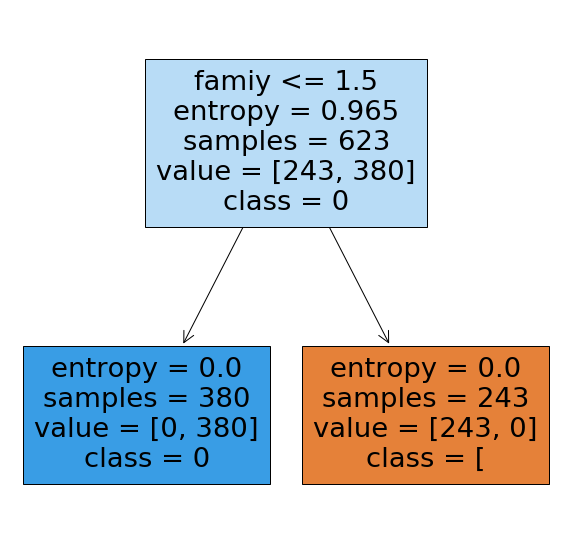

In [10]:
#Decision tree visualization for Entropy
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, 
                   feature_names=feature,  
                   class_names= str( class_labels),
                   filled=True)

[1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1
 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0
 0 0 0 1 0 1 1 0 0]


|--- feature_4 <= 1.50
|   |--- class: 1
|--- feature_4 >  1.50
|   |--- class: 0



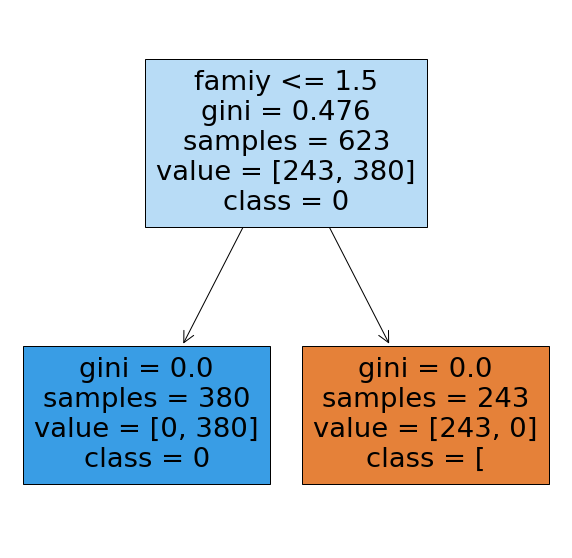

In [13]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier()
model = clf.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

text_representation = tree.export_text(clf)
print("\n\n"+text_representation)

#Decision tree visualization for Gini
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, 
                   feature_names=feature,  
                   class_names= str( class_labels),
                   filled=True)

In [91]:
from sklearn.naive_bayes import GaussianNB

NB_Gaussian = GaussianNB()

#fitting the model and traing it according to X and y.
NB_Gaussian.fit(X_train, y_train)

#NB_Gaussian is our trained model on which we are going to apply predictions.
#performing classification that is predicitng the classes on our test data.
y_bayes_pred = NB_Gaussian.predict(X_test)

print(y_bayes_pred)

#comparing our predicted output with the test output and printing the confusion matrix
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_bayes_pred)) 
#printing the accuracy of our model
print ("\nAccuracy : ", accuracy_score(y_test,y_bayes_pred)*100) 
#printing report
print("\nReport : \n", classification_report(y_test, y_bayes_pred)) 

[1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1
 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0
 0 0 0 1 0 1 1 0 0]

Confusion Matrix: 
 [[111   0]
 [  3 154]]

Accuracy :  98.88059701492537

Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.98      0.99       157

    accuracy                           0.99       268
   macro avg       0.99      0.99      0.99       268
weighted avg       0.99      0.99      0.99       268



REPORT

1)
Decision tree is a classification method. It is available in sklearn as library as DecisionTreeClassifier(). 
It probides two criterion for implementing the decision tree that are based on Gini Index and Information Gain which uses 
entropy. We have demonstrated decision tree above using both criterion. Based on the criterion specified it selects 
the best attribute to first for splitting at each node.

Naive Bayes classifier function is provided by sklearn library. In this function various type of models are available such 
as Gaussion, Bernoulli's and etc. We are here using the GaussianNB() for classifing our data. We are here creating an 
instance model of GaussianNB and training with our data which we split as training and testing. Using our testing 
data we are predictiong and calculating the accuracy and confusion matrix.

2)
The train_cl dataset has 29 features for every person and each row of the dataset represents a person and columns are the features of a person and last column isAlone is what we are predicting basing on 70% of dataset that we use for training.
Dataset provided was clean and didnt need any cleaning or preprocessing. Our code classifies the isAlone feature labelling as
'0' andn '1'.

3)
This decision tree classifier allows us to use both the techniques independtly which are gini and entropy. After performing training and predition task differently on the same training and testing data, the results in terms of accuracy are similar.

After visualizing both the trees we can see that both the algorithms chose their root node as attribute "famiy" and with the same split of 'famiy <= 1.5', after seeing all the splits at each node it appears that the decision tree generated by both the techniques are similar.

4)
We have generated 2 decision trees on the same data using two different techniques of feature selection that are Gini and Entropy. After, analysing the results using the confusion matrix, accuracy and the prediction report we can see the comparison between both of them. both Gini and Entropy has provided same reults for our dataset. It happens for very less cases that both the techniques provide different solutions. In our case of dataset which was pretty clean and structured the results obtained are same.

Naive bayes algorithm on the same dataset yielded less accuracy than decision tree. as, it was quite expected from naive bayes specifically for our dataset as it works well moslty for dynamic continuous data like live cricket match data, or any realtime continuous data. Our data being static dataset its performance is little less than Decision trees. The case for decision tree was opposite as it works well on the type of dataset we have, but would be rather slow than naive bayes on dynamic continuous data.